In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from statsmodels.formula.api import ols
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [58]:
df = pd.read_csv('kc_house_data_train.csv')

In [59]:
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,...,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,...,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,...,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,...,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


In [60]:
df['yr_built'] = df["yr_built"].astype(str)
df['yr_built'] = pd.to_datetime(df['yr_built'], format='%Y')
df['yr_old'] =  df['yr_built'].map(lambda x: 2020-x.year )

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

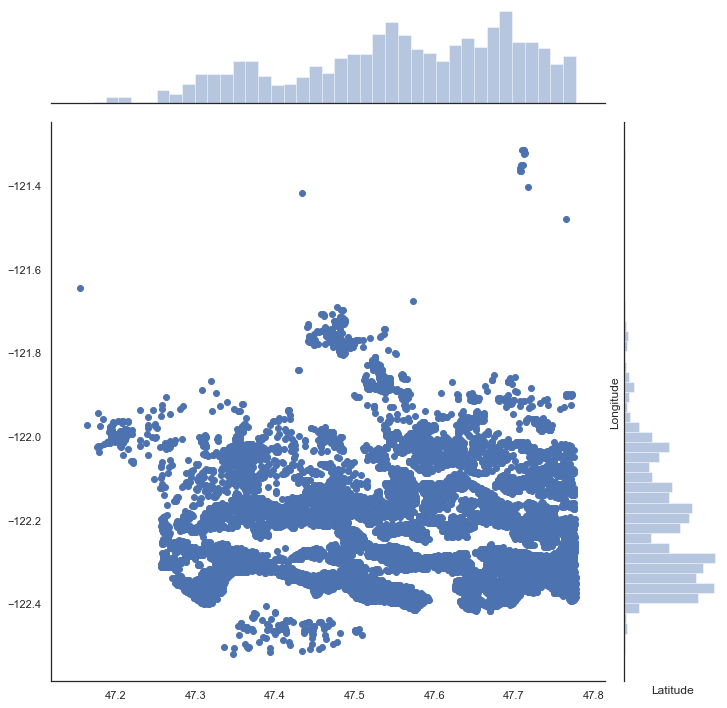

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [61]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat.values, y=df.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

In [62]:
df['geolat'] = df['lat'].apply(lambda x: 1 if (x >47.5) & (x < 47.7) else 0)
df['geolong'] = df['long'].apply(lambda x: 1 if (x >-122.4) & (x < -122.0) else 0)

In [63]:
df['geoprice'] = df['geolat'] + df['geolong']

In [64]:
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x>0 else 0)

In [65]:
df = df[df['sqft_living']<10000.000000]
df.sqft_living.describe()

count    17287.000000
mean      2079.764737
std        910.807156
min        290.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max       9890.000000
Name: sqft_living, dtype: float64

In [66]:
df = df[df['bedrooms']<30]
df.bedrooms.describe()

count    17286.000000
mean         3.370300
std          0.911302
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

In [67]:
df = df.drop(columns=['date', 'id', 'yr_built'])

In [68]:
target = df.price
features = df

In [69]:
df['price_log'] = np.log(df['price'])
df['price_sqrt'] = np.sqrt(df['price'])
df

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,yr_old,geolat,geolong,geoprice,price_log,price_sqrt
0,0,365000.0,4,2.25,2070,8893,2.0,0,0,4,...,47.4388,-122.162,2390,7700,34,0,1,1,12.807653,604.152299
1,1,865000.0,5,3.00,2900,6730,1.0,0,0,5,...,47.6784,-122.285,2370,6283,43,1,1,2,13.670485,930.053762
2,2,1038000.0,4,2.50,3770,10893,2.0,0,2,3,...,47.5646,-122.129,3710,9685,23,1,1,2,13.852806,1018.822850
3,3,1490000.0,3,3.50,4560,14608,2.0,0,2,3,...,47.6995,-122.228,4050,14226,30,1,1,2,14.214287,1220.655562
4,4,711000.0,3,2.50,2550,5376,2.0,0,0,3,...,47.6647,-122.083,2250,4050,16,1,1,2,13.474428,843.208159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,750000.0,5,2.50,3240,9960,1.0,0,1,3,...,47.5858,-122.112,2730,10400,62,1,1,2,13.527828,866.025404
17286,17286,440000.0,2,1.75,1300,4000,2.0,0,0,3,...,47.6687,-122.288,1350,4013,72,1,1,2,12.994530,663.324958
17287,17287,310000.0,3,1.00,1050,9876,1.0,0,0,3,...,47.7635,-122.262,1760,9403,67,0,1,1,12.644328,556.776436
17288,17288,427500.0,3,1.50,1900,43186,1.5,0,0,4,...,47.4199,-121.990,2080,108028,49,0,0,0,12.965710,653.834842


In [70]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=34,test_size=0.2)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
subset_scaled = []
for var in df:
    new_col = var +"_scaled"
    df[new_col] = scaler.fit_transform(df[[var]])
    subset_scaled.append(new_col)

In [72]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,yr_old,geolat,geolong,geoprice,price_log,price_sqrt
Unnamed: 0,NaN,0.011764,0.011548,0.004857,0.008832,0.001318,0.010115,0.003928,0.001573,0.000574,...,0.008045,0.004121,0.009833,0.000074,0.004887,0.003303,0.007139,0.000655,0.009250,0.010868
price,NaN,NaN,0.317305,0.524949,0.699845,0.088485,0.257372,0.247902,0.389000,0.039027,...,0.313910,0.022763,0.591271,0.084479,0.059070,0.380484,0.023473,0.325888,0.895829,0.969231
bedrooms,NaN,NaN,NaN,0.520104,0.589806,0.033423,0.175961,0.011885,0.085110,0.026507,...,0.007920,0.126742,0.401207,0.031423,0.158782,0.003772,0.018258,0.012522,0.348477,0.342872
bathrooms,NaN,NaN,NaN,NaN,0.754130,0.083870,0.499393,0.058986,0.188293,0.123548,...,0.021963,0.219192,0.567010,0.084234,0.512119,0.083657,0.078327,0.034891,0.546520,0.549645
sqft_living,NaN,NaN,NaN,NaN,NaN,0.167798,0.356395,0.093811,0.277352,0.058347,...,0.054356,0.238494,0.757028,0.183455,0.324390,0.091945,0.087270,0.037753,0.693412,0.716499
sqft_lot,NaN,NaN,NaN,NaN,NaN,NaN,0.000396,0.010856,0.075599,0.009749,...,0.079948,0.224767,0.134183,0.708100,0.051029,0.093419,0.225055,0.195987,0.097140,0.096618
floors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021623,0.021469,0.261987,...,0.050230,0.132309,0.281792,0.006093,0.490227,0.138777,0.088462,0.078718,0.309046,0.291973
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.395142,0.011819,...,0.013561,0.044681,0.087001,0.022359,0.022416,0.004520,0.018140,0.013125,0.167975,0.209720
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050657,...,0.002258,0.075700,0.279980,0.071729,0.052787,0.077700,0.066981,0.035305,0.340727,0.375539
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.012173,0.107320,0.089261,0.004954,0.359331,0.016828,0.064588,0.047387,0.041647,0.042007


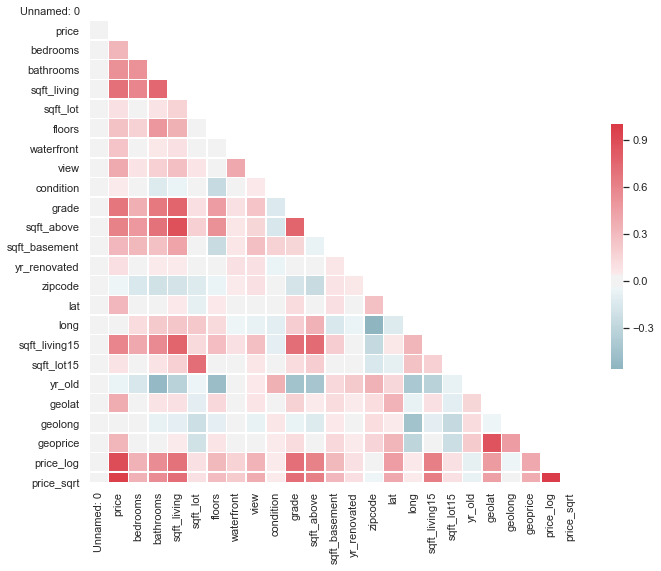

In [73]:

sns.set(style="white")


# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [74]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.round(1)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,4.0,Unnamed: 0
1,20.3,price
2,25.3,bedrooms
3,29.0,bathrooms
4,inf,sqft_living
5,2.3,sqft_lot
6,17.7,floors
7,1.3,waterfront
8,1.6,view
9,35.5,condition


In [76]:
selector = SelectKBest(f_regression, k=10)
selector.fit(X_train, y_train)

SelectKBest(k=10, score_func=<function f_regression at 0x1a1a5d6b70>)

In [77]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
X_train = X_train[selected_columns]
X_test = X_test[selected_columns]

In [78]:
list(removed_columns)

['Unnamed: 0',
 'price',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'sqft_basement',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_lot15',
 'yr_old',
 'geolong']

In [79]:
list(selected_columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'view',
 'grade',
 'sqft_above',
 'sqft_living15',
 'geolat',
 'geoprice',
 'price_log']

In [80]:
# check classification accuracy of KNN with K=5
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred))

27598082836.171272


In [82]:
lr_model = ols(formula='price~bedrooms*bathrooms+geoprice+sqft_living*sqft_above+grade*condition+yr_old+view+waterfront+sqft_living15+price_log', data=df).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     8526.
Date:                Thu, 20 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:12:37   Log-Likelihood:            -2.2756e+05
No. Observations:               17286   AIC:                         4.551e+05
Df Residuals:                   17270   BIC:                         4.553e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5.541e+06   5.11e+04   -108.498      0.000   -5.64e+06   -5.44e+06
bedrooms               -6073.4736   3012.942     -2.016      0.044    -1.2e+04    -167.802
bathrooms              -5951.2292   4919.986     -1.210      0.226   -1.56e+04    3692.441
bedrooms:bathrooms      3724.4025   1212.661      3.071      0.002    1347.465    6101.340
geoprice               -6836.2749   2071.642     -3.300      0.001   -1.09e+04   -2775.647
sqft_living              -96.0242      3.754    -25.581      0.000    -103.382     -88.666
sqft_above              -177.0174      3.814    -46.408      0.000    -184.494    -169.541
sqft_living:sqft_above     0.0637      0.001     72.684      0.000       0.062       0.065
grade                  -7.028e+04   4767.384    -14.742      0.000   -7.96e+04   -6.09e+04
condition               -1.86e+05   9914.405    -18.763      0.000   -2.05e+05   -1.67e+05
grade:condition          2.62e+04   1338.646     19.569      0.000    2.36e+04    2.88e+04
yr_old                   323.4763     47.686      6.783      0.000     230.006     416.946
view                    1.929e+04   1481.654     13.020      0.000    1.64e+04    2.22e+04
waterfront              3.674e+05    1.2e+04     30.645      0.000    3.44e+05    3.91e+05
sqft_living15             -1.8536      2.365     -0.784      0.433      -6.490       2.782
price_log               5.215e+05   3484.141    149.688      0.000    5.15e+05    5.28e+05
==============================================================================
Omnibus:                    13827.353   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1164705.884
Skew:                           3.275   Prob(JB):                         0.00
Kurtosis:                      42.676   Cond. No.                     3.34e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:

ridge_01 = Ridge(alpha=0.7)
ridge_01.fit(X_train, y_train)

lasso_01 = Lasso(alpha=0.7)
lasso_01.fit(X_train, y_train)

lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
print("Unpenalized Linear Regression Coefficients are:{}".format(lin.coef_))
print(abs(lin.coef_.sum()))
print("Unpenalized Linear Regression Intercept:{}".format(lin.intercept_))

Unpenalized Linear Regression Coefficients are:[-2.55592038e+04 -1.70311940e+04  8.45558238e+01  4.18992596e+04
  2.86014661e+03  1.62262056e+01 -2.95049991e+01 -4.52871246e+04
  4.28735022e+04  5.28321339e+05]
528148.0023191214
Unpenalized Linear Regression Intercept:-6448557.756923461


In [107]:
print("Lasso Regression Coefficients are:{}".format(lasso_01.coef_))
print(abs(lasso_01.coef_.sum()))
print("Lasso Linear Regression Intercept:{}".format(lasso_01.intercept_))

Lasso Regression Coefficients are:[-2.55579304e+04 -1.70285106e+04  8.45568517e+01  4.18984572e+04
  2.85975739e+03  1.62249920e+01 -2.95033060e+01 -4.52632428e+04
  4.28562117e+04  5.28312012e+05]
528148.033154467
Lasso Linear Regression Intercept:-6448433.881097344


In [108]:
print("Ridge Regression Coefficients are:{}".format(ridge_01.coef_))
print(abs(ridge_01.coef_.sum()))
print("Ridge Linear Regression Intercept:{}".format(ridge_01.intercept_))

Ridge Regression Coefficients are:[-2.55570276e+04 -1.70309023e+04  8.46314035e+01  4.19212454e+04
  2.90640983e+03  1.62094928e+01 -2.94774927e+01 -4.51077528e+04
  4.28382625e+04  5.27974370e+05]
528015.9685559589
Ridge Linear Regression Intercept:-6444624.012955108


In [109]:
# create predictions
y_h_ridge_train_01 = ridge_01.predict(X_train)
y_h_ridge_test_01 = ridge_01.predict(X_test)

y_h_lasso_train_01 = np.reshape(lasso_01.predict(X_train),(13828,1))
y_h_lasso_test_01 = np.reshape(lasso_01.predict(X_test),(3458,1))

y_h_lin_train = lin.predict(X_train)
y_h_lin_test = lin.predict(X_test)

In [110]:
# examine the residual sum of sq
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train_01)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test_01)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test))**2))

Train Error Ridge Model 309780003258743.0
Test Error Ridge Model 95440291839544.86


Train Error Unpenalized Linear Model 309779869001612.06
Test Error Unpenalized Linear Model 95434170447480.27
